In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



In [99]:
# read the data
data = pd.read_csv("sample_data/insurance.csv")

In [100]:
# top 10 data
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Examine the Distribution of Bmi

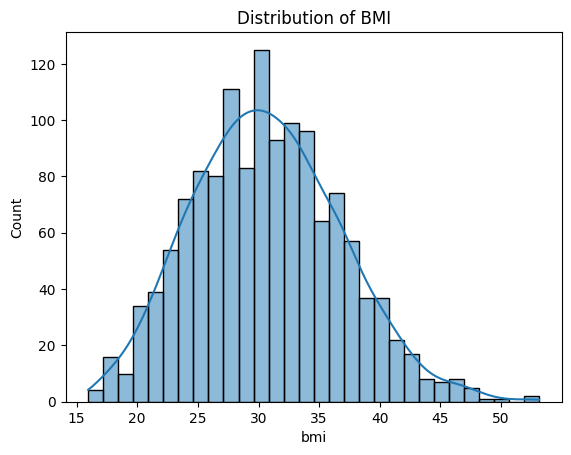

In [120]:
sns.histplot(data['bmi'], bins=30, kde=True)
plt.title("Distribution of BMI")
plt.show()

Examine the relationship between “smoker” and “charges”


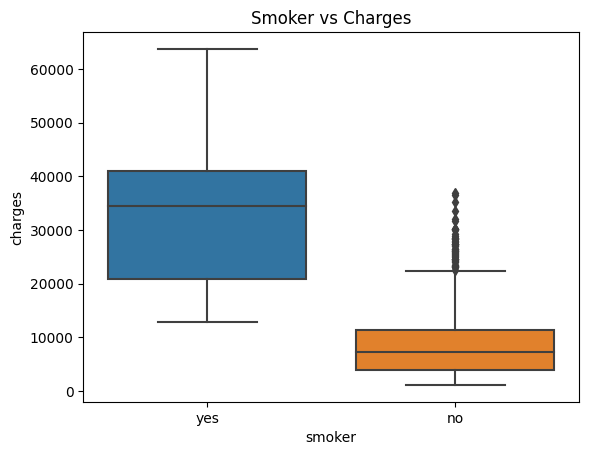

In [119]:
sns.boxplot(x=data['smoker'], y=data['charges'])
plt.title("Smoker vs Charges")
plt.show()

 Examine the relationship between “smoker” and “region”

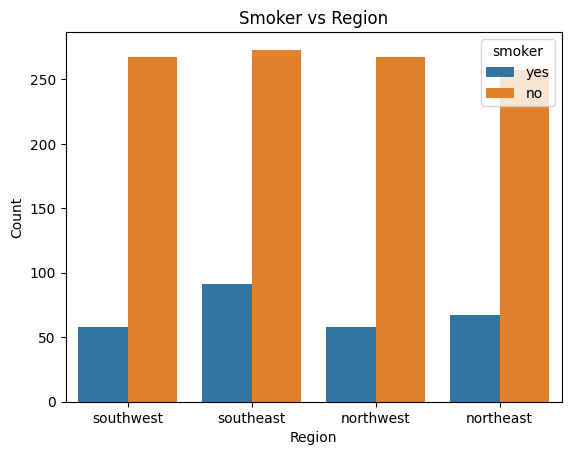

In [118]:
sns.countplot(data=data, x='region', hue='smoker')
plt.title("Smoker vs Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

Examine the relationship between “bmi” and “sex”

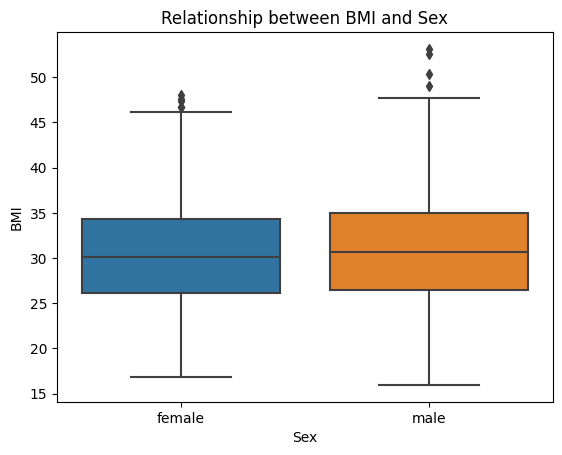

In [117]:
sns.boxplot(data=data, x='sex', y='bmi')
plt.title('Relationship between BMI and Sex')
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.show()

Find the "region" with the most "children".

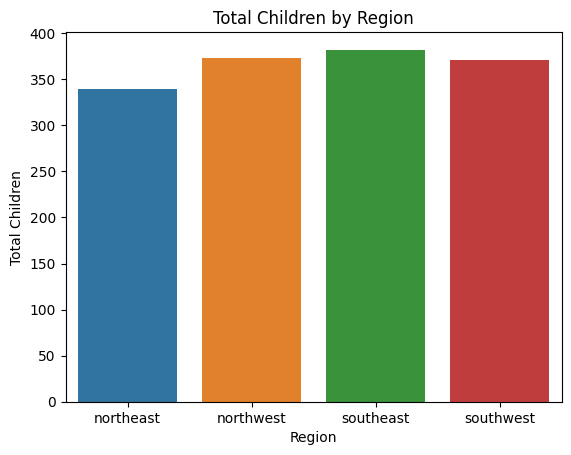

Region with the most children: southeast


In [122]:
region_children_sum = data.groupby("region")["children"].sum().reset_index()
sns.barplot(x="region", y="children", data=region_children_sum)
plt.title("Total Children by Region")
plt.xlabel("Region")
plt.ylabel("Total Children")
plt.show()
print("Region with the most children:", region_with_most_children)

Examine the relationship between “age” and “bmi”

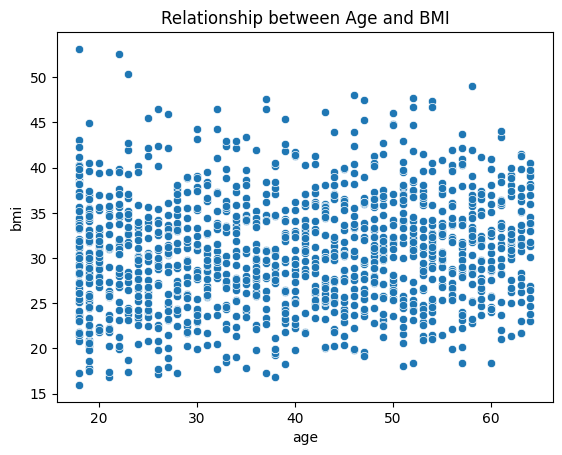

In [106]:
sns.scatterplot(x="age", y="bmi", data=data)
plt.title("Relationship between Age and BMI")
plt.show()

In [107]:
#

Examine the relationship between “bmi” and “children”.

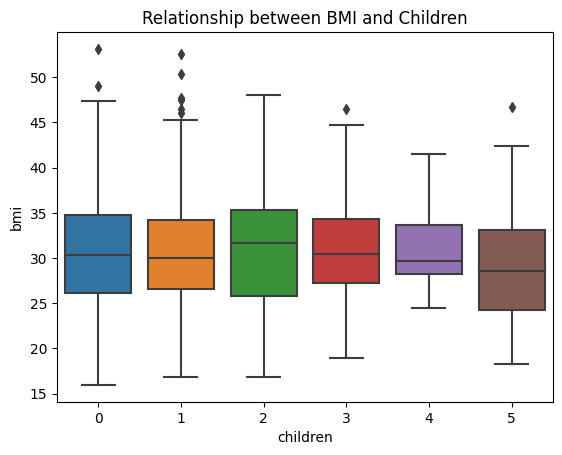

In [108]:
sns.boxplot(x="children", y="bmi", data=data)
plt.title("Relationship between BMI and Children")
plt.show()


In [109]:
# although the BMI value decreases after 4 children, in general, they all have close values.

Is there an outlier in the "bmi" variable?

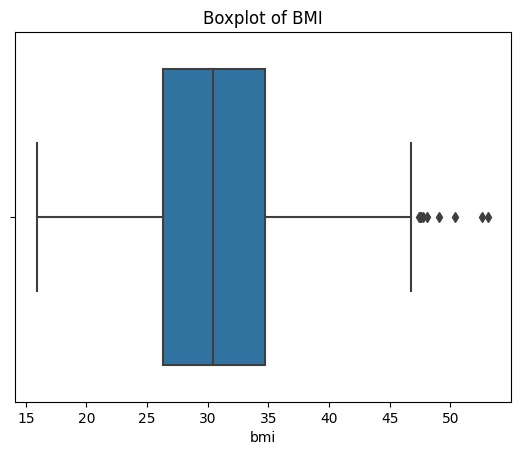

In [110]:
sns.boxplot(x=data["bmi"])
plt.title("Boxplot of BMI")
plt.show()


In [111]:
#as we can understand from the points located outside the box, we have outliers

Examine the relationship between “bmi” and “charges”.

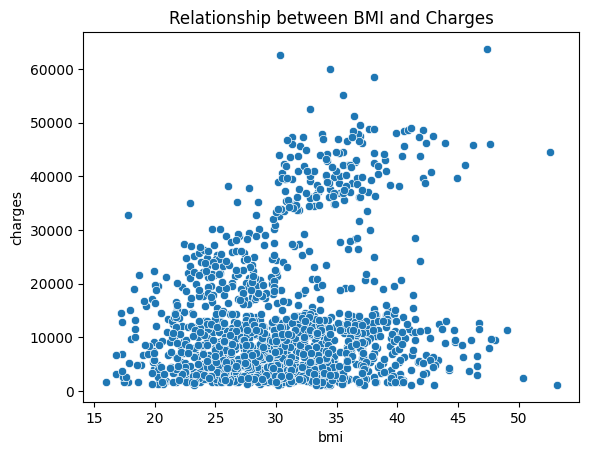

In [112]:
sns.scatterplot(x="bmi", y="charges", data=data)
plt.title("Relationship between BMI and Charges")
plt.show()


Examine the relationship between “region”, “smoker” and “bmi” using bar plot

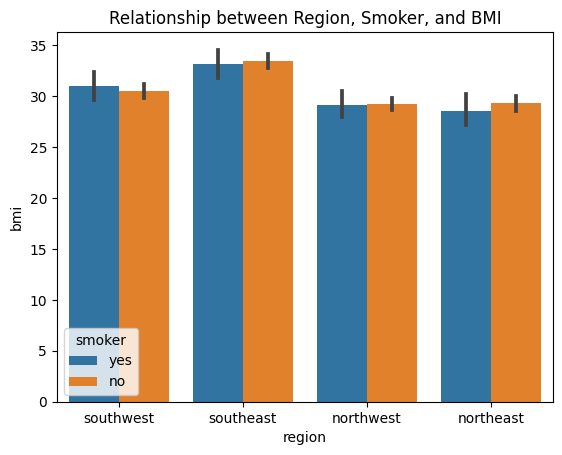

In [113]:
sns.barplot(x="region", y="bmi", hue="smoker", data=data)
plt.title("Relationship between Region, Smoker, and BMI")
plt.show()


Data Preprocessing

In [123]:
# Encode categorical variables using Label Encoding and One-Hot Encoding
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data = pd.get_dummies(data, columns=['region'], drop_first=True)

# Split the dataset into features (X) and target (y)
X = data.drop('charges', axis=1)
y = data['charges']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using Min-Max Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model Selection


In [126]:
# Initialize models
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor(random_state=42)
random_forest_reg = RandomForestRegressor(random_state=42)

# Perform cross-validation and evaluate models
models = [linear_reg, decision_tree_reg, random_forest_reg]
for model in models:
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f"Model: {model.__class__.__name__}")
    print(f"RMSE: Mean = {rmse_scores.mean()}, Std = {rmse_scores.std()}")



Model: LinearRegression
RMSE: Mean = 6147.093944016903, Std = 401.40639289735253
Model: DecisionTreeRegressor
RMSE: Mean = 6786.295194739755, Std = 521.1127724424323
Model: RandomForestRegressor
RMSE: Mean = 4961.850132483001, Std = 479.5497351777372


Hyper-parameter Optimization

In [128]:
# Hyper-parameter tuning for the Random Forest Regressor
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=random_forest_reg, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)


Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}


Model Evaluation

In [129]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 20051443.94719875
Root Mean Squared Error: 4477.883869329211
Mean Absolute Error: 2685.8767474313954
